In [124]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
# %matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
import sys
# from scipy.misc.pilutil import imread
from scipy.linalg import norm
from scipy import sum, average

from skimage.measure import compare_ssim
import argparse
import imutils
import cv2

from sklearn.metrics import classification_report, confusion_matrix

from skimage.color import rgb2hsv
import skimage
from PIL import Image  
import PIL 
import cv2
# from google.colab.patches import cv2_imshow
import numpy as np
import PIL.ImageStat as stat
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from PIL import Image, ImageOps
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl 
from skimage.util import invert, random_noise, montage
import random
import time
from PIL import Image
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve,confusion_matrix,f1_score,precision_recall_curve



import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageOps
import scipy.ndimage as ndi

import sys,os
from PIL import Image, ImageFile, ImageDraw, ImageChops, ImageFilter
from skimage.restoration import (denoise_bilateral, denoise_tv_chambolle, denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float
from skimage.util import random_noise
from skimage.io import imshow

from sklearn.neighbors import KNeighborsClassifier


from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import KFold
import numpy as np


In [2]:

import os
for dirname, _, filenames in os.walk('C:/Users/Ali Nawaz/Desktop/akhyar project'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/Ali Nawaz/Desktop/akhyar project\10-techniques-to-handle-imbalance-data.ipynb
C:/Users/Ali Nawaz/Desktop/akhyar project\12_Nov_Lab_20(Machine Learning)IRIS Dataset.ipynb
C:/Users/Ali Nawaz/Desktop/akhyar project\3-simple-neural-network-with-keras-and-tensorflow.ipynb
C:/Users/Ali Nawaz/Desktop/akhyar project\4-diabetes-detection-using-keras.ipynb
C:/Users/Ali Nawaz/Desktop/akhyar project\5-diabetes-eda-prediction-0-906 .ipynb
C:/Users/Ali Nawaz/Desktop/akhyar project\5-pima-indians-diabetes-eda-prediction-0-906 try krna.ipynb
C:/Users/Ali Nawaz/Desktop/akhyar project\6-predictive-modelling-knn-ann-xgboost.ipynb
C:/Users/Ali Nawaz/Desktop/akhyar project\7-pima-deeplearning-prediction-91-2-acc-86-val-acc.ipynb
C:/Users/Ali Nawaz/Desktop/akhyar project\8-0-9368-roc-auc-score-with-svc.ipynb
C:/Users/Ali Nawaz/Desktop/akhyar project\9-predict-diabetes-using-svm-100-accuracy (Final 1).ipynb
C:/Users/Ali Nawaz/Desktop/akhyar project\Akhyar Code + Data.rar
C:/Users/Ali Nawaz/Desktop/a

In [3]:
#Loading the dataset
diabetes_data = pd.read_csv('diabetes2.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#read the dataset
df = pd.read_csv('diabetes2.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Checking the values of target variable / Data Imbalance


In [7]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Scatter Plot


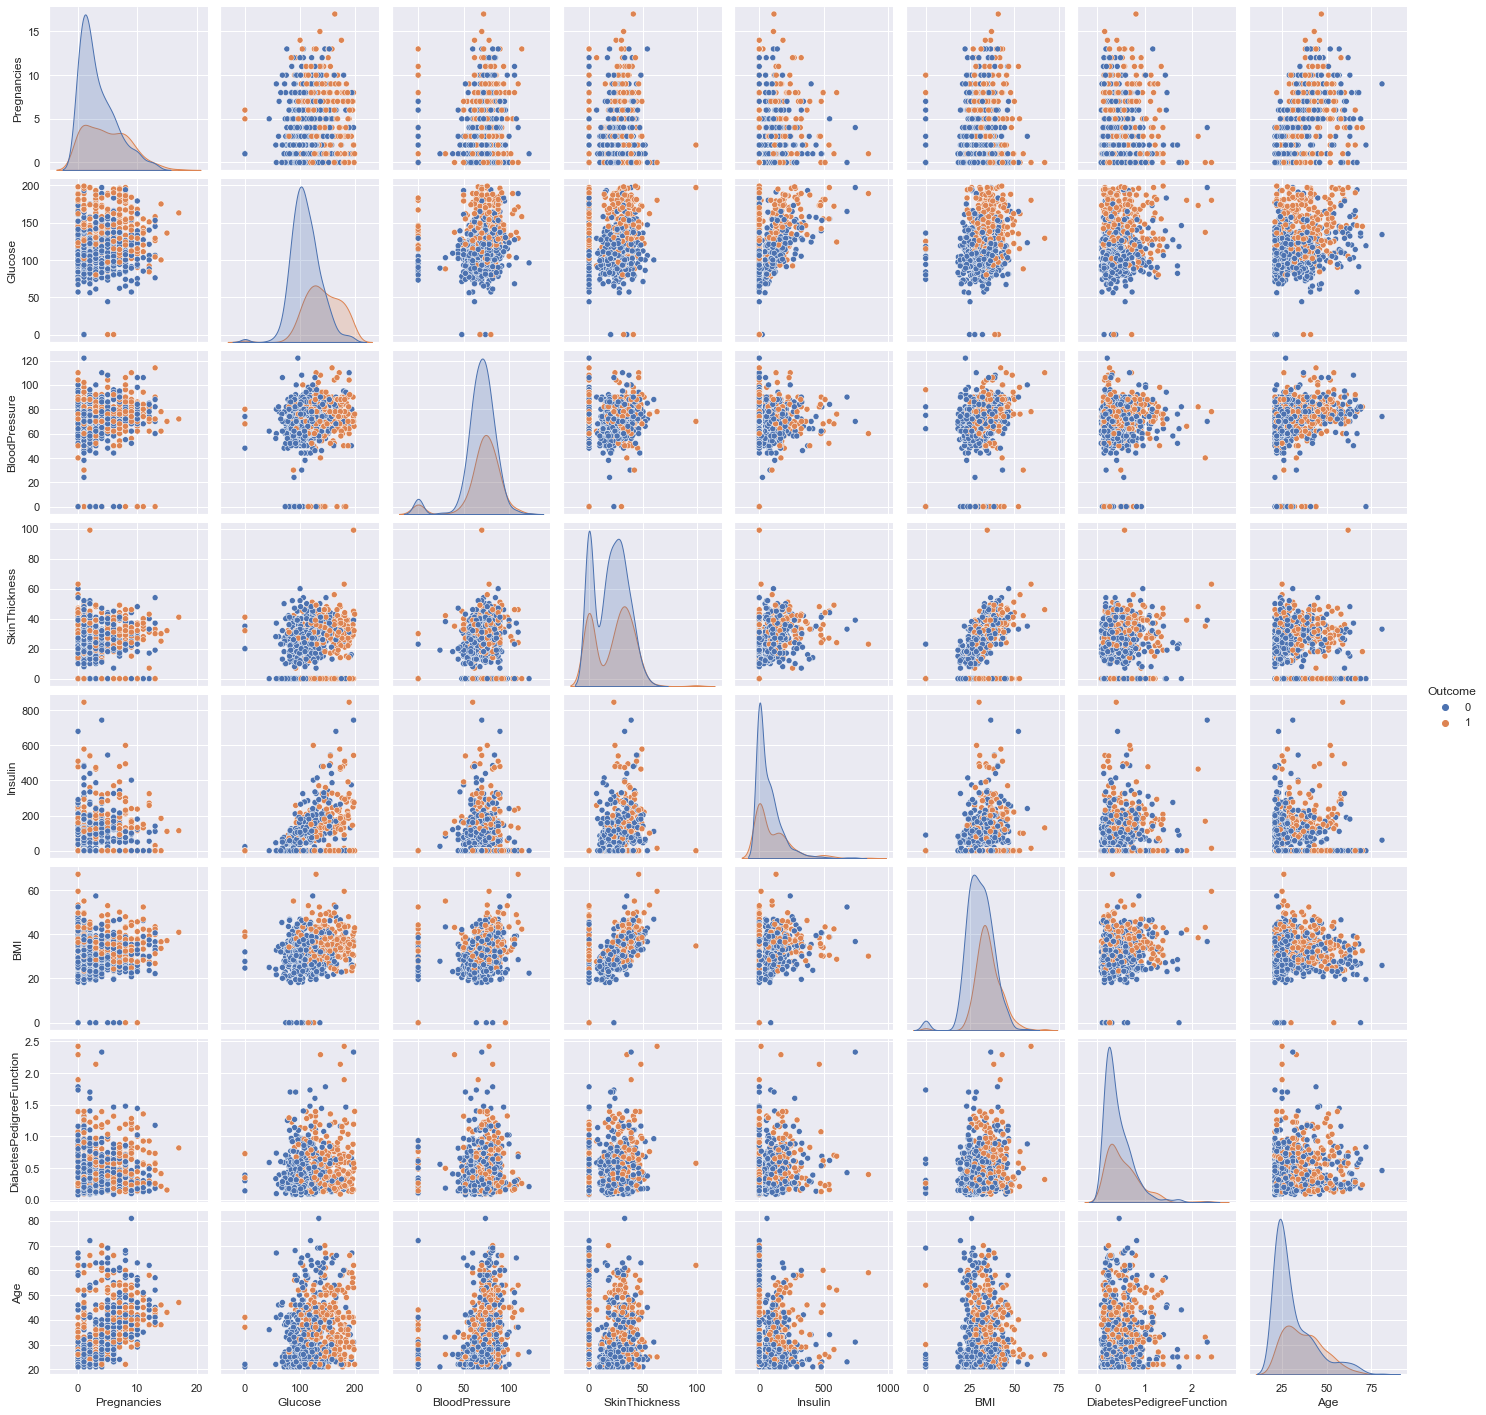

In [9]:
sns.pairplot(df,hue='Outcome')

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


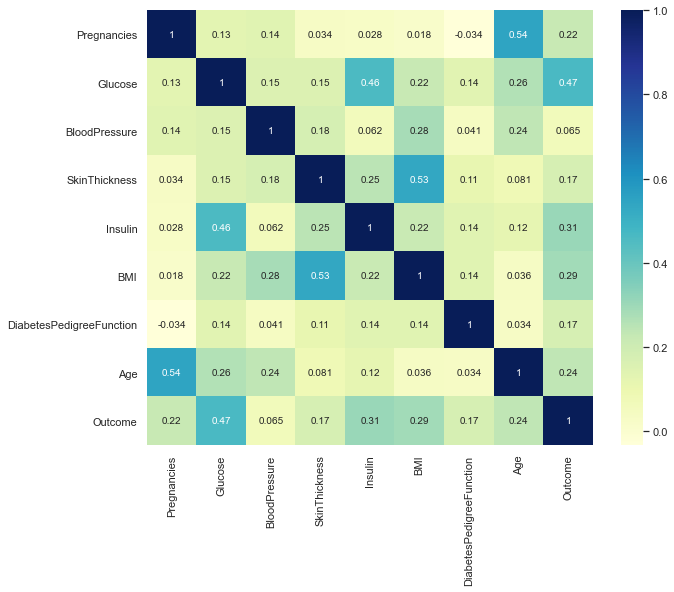

In [70]:
sns.heatmap(df.corr(),annot=True, cmap = 'YlGnBu')
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()
# corrmat= df.corr()
# plt.figure(figsize=(15, 10))
# sns.heatmap(corrmat, vmax=.8, square=True, annot= True)

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

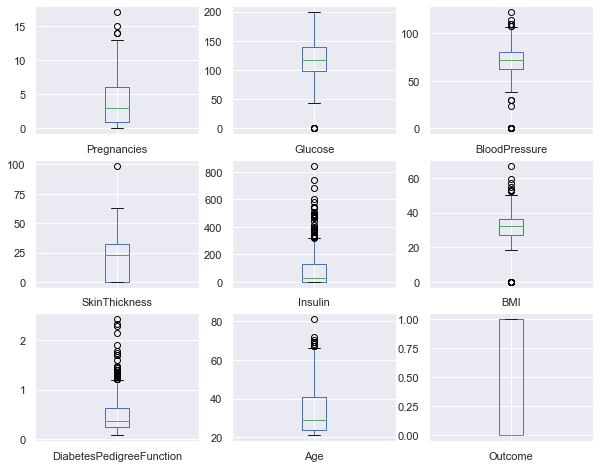

In [13]:
df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))


Text(0, 0.5, 'Count')

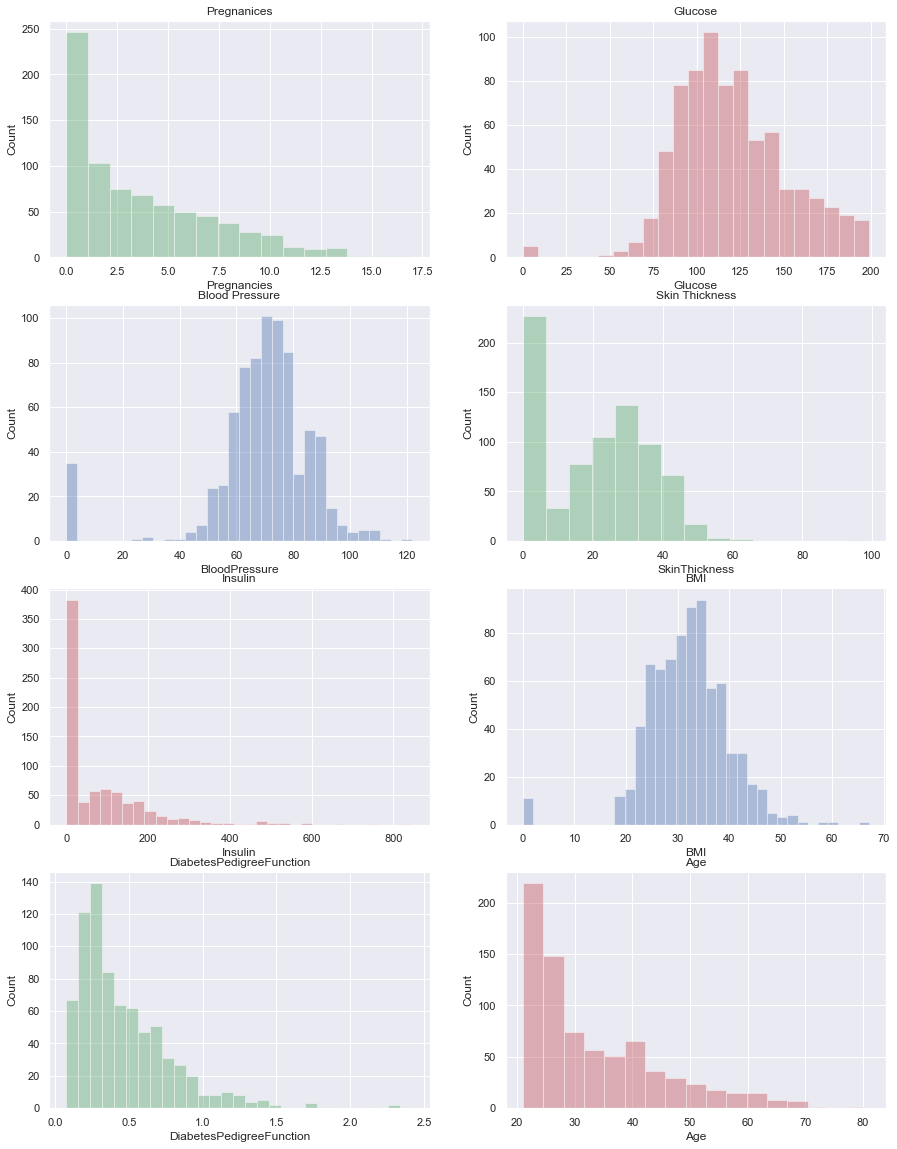

In [14]:
# Set up the matplotlib figure
f, axes = plt.subplots(nrows=4,ncols=2, figsize=(15, 20))

# Graph pregnancies
sns.distplot(df.Pregnancies, kde=False, color="g", ax=axes[0][0]).set_title('Pregnanices')
axes[0][0].set_ylabel('Count')

# Graph Glucose
sns.distplot(df.Glucose, kde=False, color="r", ax=axes[0][1]).set_title('Glucose')
axes[0][1].set_ylabel('Count')

# Graph Blood Pressure
sns.distplot(df.BloodPressure, kde=False, color="b", ax=axes[1][0]).set_title('Blood Pressure')
axes[1][0].set_ylabel('Count')

# Graph Skin Thickness
sns.distplot(df.SkinThickness, kde=False, color="g", ax=axes[1][1]).set_title('Skin Thickness')
axes[1][1].set_ylabel('Count')

# Graph Insulin
sns.distplot(df.Insulin, kde=False, color="r", ax=axes[2][0]).set_title('Insulin')
axes[2][0].set_ylabel('Count')

# Graph BMI
sns.distplot(df.BMI, kde=False, color="b", ax=axes[2][1]).set_title('BMI')
axes[2][1].set_ylabel('Count')

# Graph Diabetes Pedigree function
sns.distplot(df.DiabetesPedigreeFunction, kde=False, color="g", ax=axes[3][0]).set_title('DiabetesPedigreeFunction')
axes[3][0].set_ylabel('Count')

# Graph Age
sns.distplot(df.Age, kde=False, color="r", ax=axes[3][1]).set_title('Age')
axes[3][1].set_ylabel('Count')


In [17]:
pima_new= df
# Removing Outliers in the data based on Box Plots 
pima_new = pima_new[pima_new["Pregnancies"] <13]
pima_new = pima_new[(pima_new["Glucose"] > 30)]
#pima_new = pima_new[(pima_new['BloodPressure'] > 26) & (pima_new['BloodPressure'] <105) ]
#pima_new = pima_new[pima_new['Insulin'] < 300]
pima_new = pima_new[pima_new['BMI'] > 10]  
pima_new =pima_new[pima_new['BMI'] <50]
pima_new = pima_new[pima_new['DiabetesPedigreeFunction'] < 1.2]
pima_new = pima_new[pima_new['Age'] < 65]

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

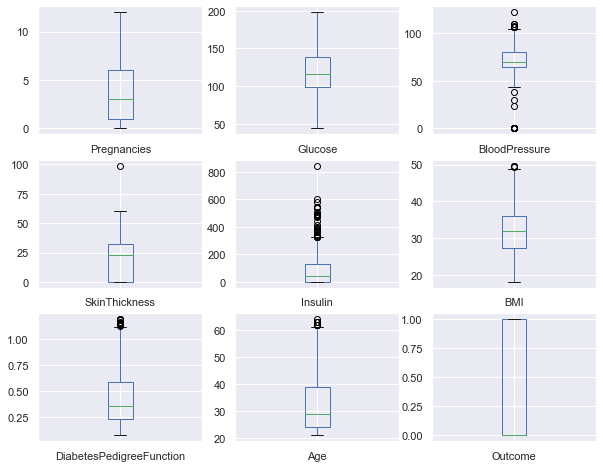

In [18]:
pima_new.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

In [19]:
# check for na values
df[df.isna()].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(0.5, 1.0, 'Pregnancies vs Yes or No')

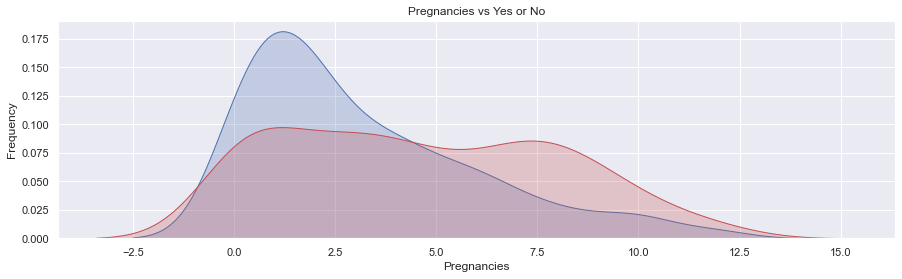

In [20]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(pima_new.loc[(pima_new['Outcome'] == 0),'Pregnancies'] , color='b',shade=True,label='No')
ax=sns.kdeplot(pima_new.loc[(pima_new['Outcome'] == 1),'Pregnancies'] , color='r',shade=True, label='Yes')
ax.set(xlabel='Pregnancies', ylabel='Frequency')
plt.title('Pregnancies vs Yes or No')

Text(0.5, 1.0, 'Glucose vs Yes or No')

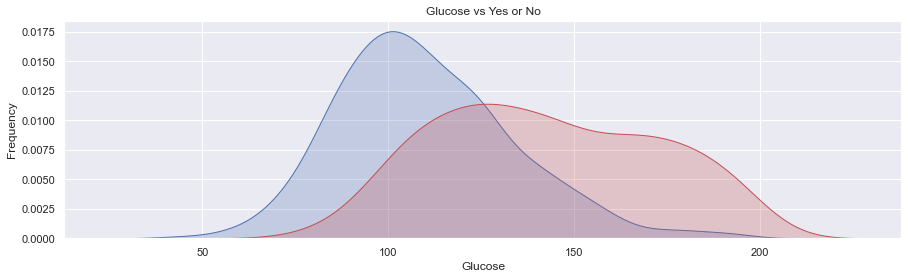

In [21]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(pima_new.loc[(pima_new['Outcome'] == 0),'Glucose'] , color='b',shade=True,label='No')
ax=sns.kdeplot(pima_new.loc[(pima_new['Outcome'] == 1),'Glucose'] , color='r',shade=True, label='Yes')
ax.set(xlabel='Glucose', ylabel='Frequency')
plt.title('Glucose vs Yes or No')

Text(0.5, 1.0, 'BMI vs Yes or No')

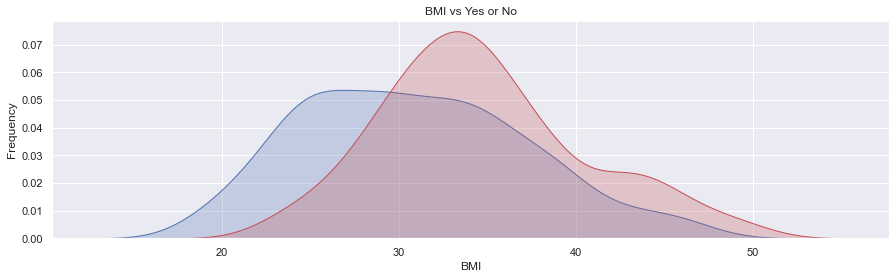

In [22]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(pima_new.loc[(pima_new['Outcome'] == 0),'BMI'] , color='b',shade=True,label='No')
ax=sns.kdeplot(pima_new.loc[(pima_new['Outcome'] == 1),'BMI'] , color='r',shade=True, label='Yes')
ax.set(xlabel='BMI', ylabel='Frequency')
plt.title('BMI vs Yes or No')

Text(0.5, 1.0, 'DiabetesPedigreeFunction vs Yes or No')

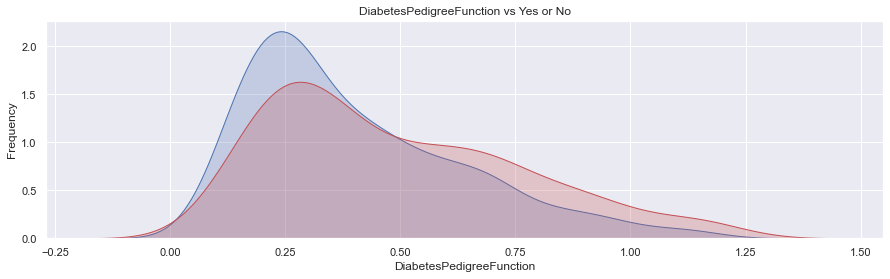

In [23]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(pima_new.loc[(pima_new['Outcome'] == 0),'DiabetesPedigreeFunction'] , color='b',shade=True,label='No')
ax=sns.kdeplot(pima_new.loc[(pima_new['Outcome'] == 1),'DiabetesPedigreeFunction'] , color='r',shade=True, label='Yes')
ax.set(xlabel='DiabetesPedigreeFunction', ylabel='Frequency')
plt.title('DiabetesPedigreeFunction vs Yes or No')

Text(0.5, 1.0, 'Age vs Yes or No')

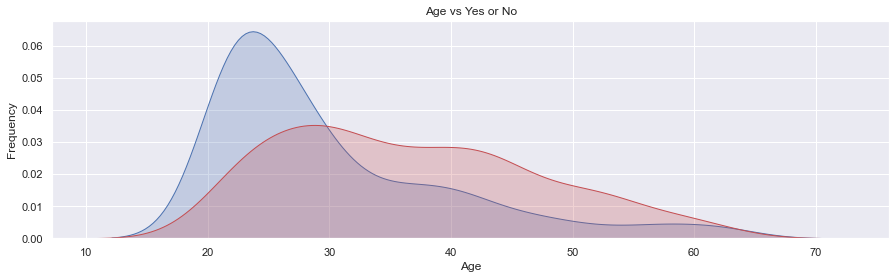

In [24]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(pima_new.loc[(pima_new['Outcome'] == 0),'Age'] , color='b',shade=True,label='No')
ax=sns.kdeplot(pima_new.loc[(pima_new['Outcome'] == 1),'Age'] , color='r',shade=True, label='Yes')
ax.set(xlabel='Age', ylabel='Frequency')
plt.title('Age vs Yes or No')

In [33]:
#fill Insulin's zero values
Insulin_by_outcome = pima_new.groupby(['Outcome']).mean()['Insulin']

def fixInsulin(insulin, outcome):
    if insulin == 0:
        return Insulin_by_outcome[outcome]
    else:
        return insulin
    
pima_new['Insulin'] = pima_new.apply(lambda row : fixInsulin(row['Insulin'], row['Outcome']), axis=1)

In [34]:
#fill SkinThickness's zero values
skinThickness_by_outcome = pima_new.groupby(['Outcome']).mean()['SkinThickness']

def fixSkinThickness(skinThickness, outcome):
    if skinThickness == 0:
        return skinThickness_by_outcome[outcome]
    else:
        return skinThickness
    
pima_new['SkinThickness'] = pima_new.apply(lambda row : fixSkinThickness(row['SkinThickness'], row['Outcome']), axis=1)

In [35]:
#fill BloodPressure's zero values

bloodPressure_by_outcome = pima_new.groupby(['Outcome']).mean()['BloodPressure']

def fixBloodPressure(bloodPressure, outcome):
    if bloodPressure == 0:
        return bloodPressure_by_outcome[outcome]
    else:
        return bloodPressure
    
pima_new['BloodPressure'] = pima_new.apply(lambda row : fixBloodPressure(row['BloodPressure'], row['Outcome']), axis=1)

In [36]:
#fill Glucose's zero values

glucose_by_outcome = pima_new.groupby(['Outcome']).mean()['Glucose']

def fixGlucose(glucose, outcome):
    if glucose == 0:
        return glucose_by_outcome[outcome]
    else:
        return glucose
    
pima_new['Glucose'] = pima_new.apply(lambda row : fixGlucose(row['Glucose'], row['Outcome']), axis=1)

In [37]:
#fill BMI's zero values

bim_by_outcome = pima_new.groupby(['Outcome']).mean()['BMI']

def fixBMI(bim, outcome):
    if bim == 0:
        return bim_by_outcome[outcome]
    else:
        return bim
    
pima_new['BMI'] = pima_new.apply(lambda row : fixBMI(row['BMI'], row['Outcome']), axis=1)

In [38]:
# try to compute a 'Sex' columns based on pregnancy (if more than zero for sure is a female)

def getSex(pregnancy):
    if pregnancy > 0:
        return 1 #'Female'
    else:
        return 0 #'Unknown'
    
pima_new['Sex'] = pima_new.apply(lambda row : getSex(row['Pregnancies']), axis=1)

In [40]:
#drop some outliers based on scatterplots (not shown here)

pima_new = pima_new[pima_new.Glucose > 50]
print(len(pima_new))
pima_new = pima_new[(pima_new.BloodPressure > 42) | (pima_new.BloodPressure < 116)]
print(len(pima_new))
pima_new = pima_new[(pima_new.SkinThickness > 5) | (pima_new.SkinThickness < 58)]
print(len(pima_new))
pima_new = pima_new[pima_new.Insulin < 625]
print(len(pima_new))
pima_new = pima_new[(pima_new.BMI > 15) | (pima_new.BMI < 55)]
print(len(pima_new))
pima_new = pima_new[pima_new.DiabetesPedigreeFunction < 55]
print(len(pima_new))
pima_new = pima_new[pima_new.Age < 70]
print(len(pima_new))

685
685
685
685
685
685
685


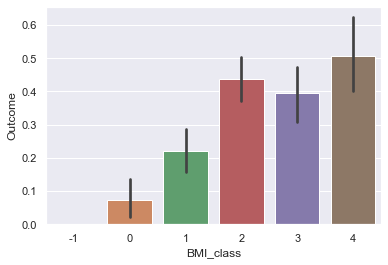

In [41]:
# add BMI classes as per World Health Organizations

BMI_OMSNutritional_map = {
-1:(0,18.5), #'Underweight'
0:(18.5,24.9), #'Normal weight'
1: (24.9,29.9), #'Pre-obesity'
2: (29.9,34.9), #'Obesity class I'
3: (34.9,39.9), #'Obesity class II'
4: (39.9, 1000) #'Obesity class III'
}

def getBMIClass(bmi):
    bmi_class = -100
    for limit_index, limit in enumerate(BMI_OMSNutritional_map.values()):
        if int(bmi) >= limit[0] and int(bmi) < limit[1]: # >= for lower limit tends to assign higher category rather than lower
            bmi_class = list(BMI_OMSNutritional_map.keys())[limit_index]
            break
    if bmi_class == -100:
        print('Assined -100 class for: %d' %(bmi))
    return bmi_class

pima_new['BMI_class'] = pima_new.apply(lambda row : getBMIClass(row['BMI']), axis=1)
sns.barplot(x=pima_new.BMI_class, y=pima_new.Outcome,data=pima_new)

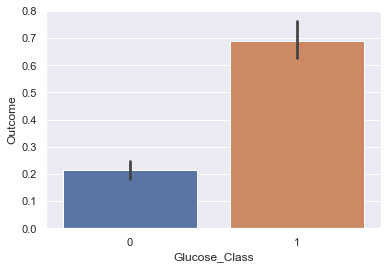

In [42]:
# There is no documentation about how the 'Glucose' measure is taken in the dataset, anyway I try to consider the following:
# A blood sugar level less than 140 mg/dL (7.8 mmol/L) is normal.
# A reading between 140 and 199 mg/dL (7.8 mmol/L and 11.0 mmol/L) indicates prediabetes
# A reading of more than 200 mg/dL (11.1 mmol/L) after two hours indicates diabetes.


OMS_Glucose_map = {
0 :(0,140), #'normal'
1:(140,200), #'prediabetes'
2: (200,1000) #'diabetes'
}



def getGlucoseClass(glucose):
    glucose_class = 'None'
    for limit_index, limit in enumerate(OMS_Glucose_map.values()):
        if glucose >= limit[0] and glucose < limit[1]: # >= for lower limit tends to assign higher category rather than lower
            glucose_class = list(OMS_Glucose_map.keys())[limit_index]
            break
    return glucose_class

pima_new['Glucose_Class'] = pima_new.apply(lambda row : getGlucoseClass(row['Glucose']), axis=1)
sns.barplot(x=pima_new.Glucose_Class, y=pima_new.Outcome,data=pima_new)

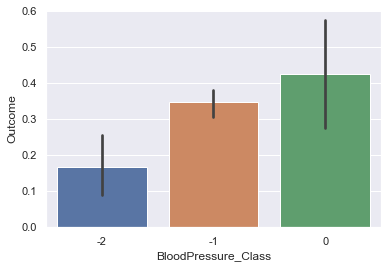

In [43]:
#ideal blood pressure is considered to be between 90/60mmHg and 120/80mmHg.
#high blood pressure is considered to be 140/90mmHg or higher.
#low blood pressure is considered to be 90/60mmHg or lower.

Pressure_map = {
-1:(60,90), #'low'
0: (90,140), #'ideal'
1 : (140,1000) #'high'
}

def getPressureClass(pressure):
    pressure_class = -2
    for limit_index, limit in enumerate(Pressure_map.values()):
        if pressure >= limit[0] and pressure < limit[1]: # >= for lower limit tends to assign higher category rather than lower
            pressure_class = list(Pressure_map.keys())[limit_index]
            break
    return pressure_class

pima_new['BloodPressure_Class'] = pima_new.apply(lambda row : getPressureClass(row['BloodPressure']), axis=1)
sns.barplot(x=pima_new.BloodPressure_Class, y=pima_new.Outcome,data=pima_new)

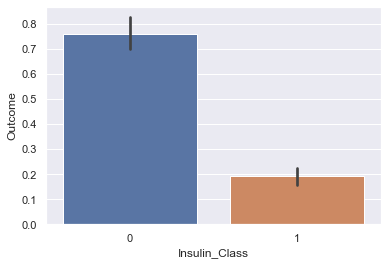

In [44]:
# add Insulin classes: 100 and 126 limits are values found on several articles on Internet

def getInsulinClass(insulin): 
    if insulin >= 100 and insulin <= 126:
        return 0 #'Normal'
    else:
        return 1 #'Abnormal'

pima_new['Insulin_Class'] = pima_new.apply(lambda row : getInsulinClass(row['Insulin']), axis=1)
sns.barplot(x=pima_new.Insulin_Class, y=pima_new.Outcome,data=pima_new)

In [45]:
# see which are the most correlated features
pima_new.corr()['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.511914
Glucose_Class               0.434867
Insulin                     0.307794
Age                         0.282883
BMI                         0.281914
BMI_class                   0.272004
Pregnancies                 0.220708
SkinThickness               0.173128
DiabetesPedigreeFunction    0.166539
BloodPressure               0.161535
BloodPressure_Class         0.126114
Sex                         0.004215
Insulin_Class              -0.517594
Name: Outcome, dtype: float64

In [48]:
# prepare the dataset for training and predictions

# pima_new = pima_new.get_dummies(pima_new)
X = pima_new.drop(['Outcome'], axis=1)
Y = pima_new.Outcome.values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify = pima_new.Outcome, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
X_train.shape

(513, 13)

In [50]:
Y_train.shape

(513,)

In [113]:

#try with GradientBoosting and all collected features

regressor = GradientBoostingClassifier(n_estimators=60)
regressor.fit(X_train,Y_train)

Y_train_pred = regressor.predict(X_train)
Y_test_pred = regressor.predict(X_test)

accuracy_train = accuracy_score(Y_train,Y_train_pred)
accuracy_test = accuracy_score(Y_test,Y_test_pred)


print('GradientBoost Accuracy\ttrain: %.4f , test: %.4f' %(accuracy_train,accuracy_test))

# See how accuracy already improved

GradientBoost Accuracy	train: 0.9747 , test: 0.8779


In [58]:
# The number of feature is not very big: try all possible feature's combinations to get the best performing list of features

columns = pima_new.columns
columns = columns.drop('Outcome')

Y = pima_new.Outcome.values

best_test_accuracy = 0
best_feature_list = []

for n_features in range(1,len(columns)):
    for comb in combinations(columns,n_features):
        feature_list = [e for e in comb]
        #print(feature_list)
        X = pima_new[feature_list]
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify = pima_new.Outcome, random_state=0)
        regressor = GradientBoostingClassifier(n_estimators=70)
        regressor.fit(X_train,Y_train)

        Y_train_pred = regressor.predict(X_train)
        Y_test_pred = regressor.predict(X_test)

        accuracy_train = accuracy_score(Y_train,Y_train_pred)
        accuracy_test = accuracy_score(Y_test,Y_test_pred)
        if accuracy_test > best_test_accuracy:
            best_test_accuracy = accuracy_test
            best_feature_list = feature_list
            print('GradientBoost Accuracy\ttrain: %.4f , test: %.4f' %(accuracy_train,accuracy_test))
            
print("best feature list: " + str(feature_list))


# It looks like the best feature list for GradientBoosting contains: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
# 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Sex', 'BMI_class', 'Glucose_Class', 'BloodPressure_Class', 'Insulin_Class']
# the accuracy on test set is around 0.91


#GradientBoost Accuracy	train: 0.9474 , test: 0.9058
#GradientBoost Accuracy	train: 0.9474 , test: 0.9110

GradientBoost Accuracy	train: 0.7154 , test: 0.6453
GradientBoost Accuracy	train: 0.7895 , test: 0.7442
GradientBoost Accuracy	train: 0.8051 , test: 0.7558
GradientBoost Accuracy	train: 0.9123 , test: 0.7965
GradientBoost Accuracy	train: 0.9376 , test: 0.8256
GradientBoost Accuracy	train: 0.8947 , test: 0.8488
GradientBoost Accuracy	train: 0.9376 , test: 0.8779
GradientBoost Accuracy	train: 0.9396 , test: 0.8837
GradientBoost Accuracy	train: 0.9415 , test: 0.8953
GradientBoost Accuracy	train: 0.9649 , test: 0.9012
GradientBoost Accuracy	train: 0.9552 , test: 0.9070
GradientBoost Accuracy	train: 0.9532 , test: 0.9128
best feature list: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Sex', 'BMI_class', 'Glucose_Class', 'BloodPressure_Class', 'Insulin_Class']


In [105]:
predict_proba = regressor.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(Y_test, predict_proba[:,1])
thresholds=np.concatenate([thresholds, [1.0]])

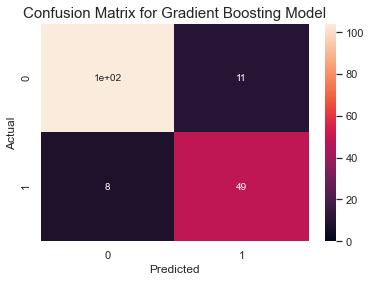

In [60]:
#Confusion matrix for best Linear RF model:
from sklearn.metrics import confusion_matrix

con_mat = pd.crosstab(Y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(con_mat,annot=True,vmin=0)
plt.title("Confusion Matrix for Gradient Boosting Model", fontsize=15)
plt.show()

In [62]:
import sklearn

In [63]:
sklearn.metrics.accuracy_score(Y_test, y_pred.round())

0.8895348837209303

In [65]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       115
           1       0.82      0.86      0.84        57

    accuracy                           0.89       172
   macro avg       0.87      0.88      0.88       172
weighted avg       0.89      0.89      0.89       172



In [98]:
def scoring(regressor, X_test, Y_test):
    y_pred = regressor.predict(X_test)
    rfc_mat = confusion_matrix(Y_test, y_pred)
    print('Recall: ', recall_score(Y_test, y_pred))
    print('Precision: ', precision_score(Y_test, y_pred))
    print('Roc-auc score: ',roc_auc_score(Y_test,y_pred_proba))
    print('F1 score: ', f1_score(Y_test, y_pred))
    sns.heatmap(rfc_mat,annot=True,fmt='1')
    plt.xlabel('True classes')
    plt.ylabel('Predictions')
    plt.show()


Recall:  0.8596491228070176
Precision:  0.8166666666666667
Roc-auc score:  0.9578947368421052
F1 score:  0.8376068376068376


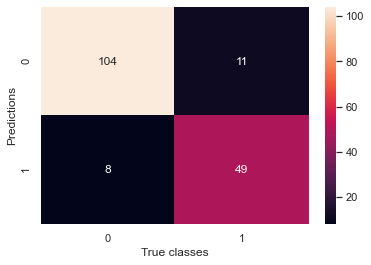

In [99]:
scoring(regressor, X_test, Y_test)

In [83]:
from sklearn.metrics import roc_curve
y_pred_proba = regressor.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

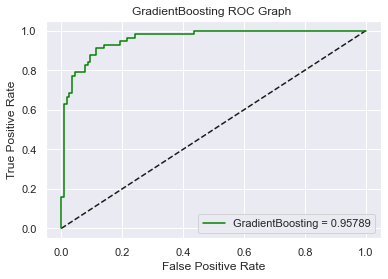

In [112]:
plt.plot([0,1],[0,1],'k--')

plt.plot(fpr,tpr, label='GradientBoosting = 0.95789', color='green' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('GradientBoosting ROC Graph ')
plt.show()